In [118]:
import glob
from scipy.signal import savgol_filter, find_peaks
import numpy as np

from voltammetry import preprocessing, plotting, fitting

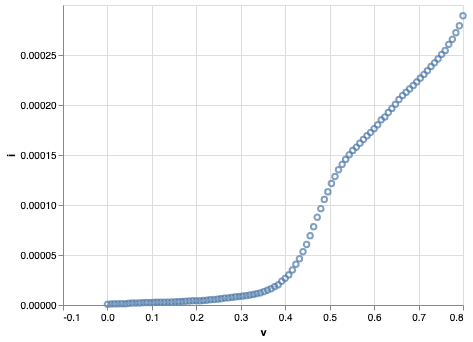

1.56487e-05 -0.652287


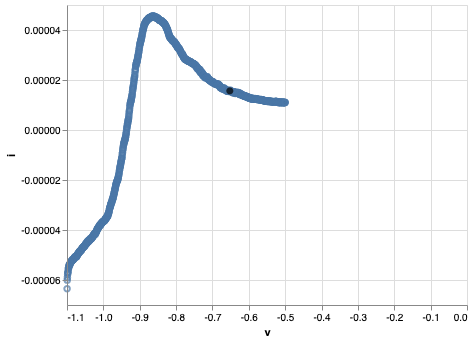

2.7759e-05 -0.648086


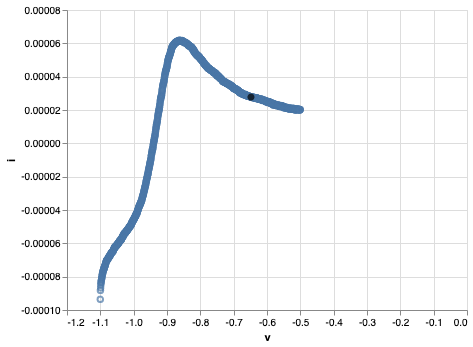

0.00013709 -0.740565


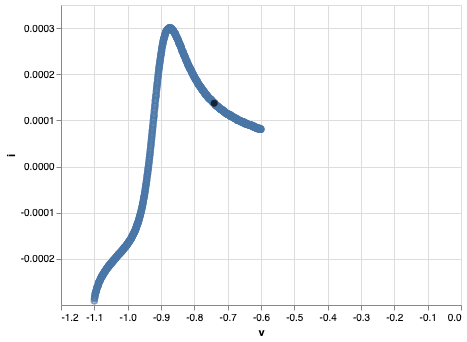

2.18592e-05 -0.67295


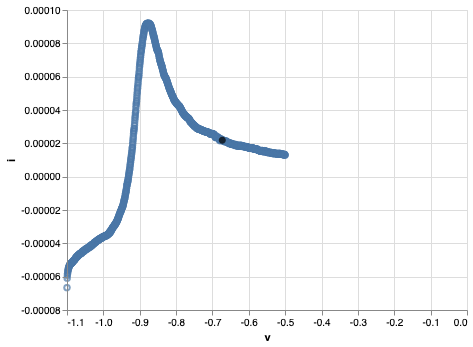

3.04816e-05 -0.649795


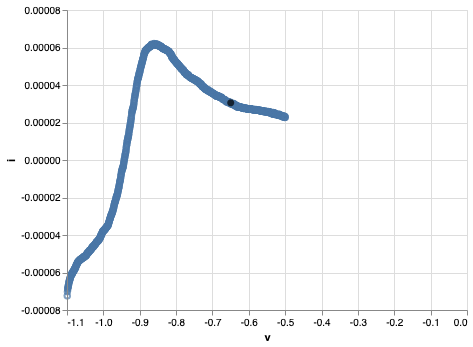

In [247]:
data_dir = 'data/*.DTA*'
n=0
for filename in glob.iglob(data_dir):
    if n<= 5:
        t,i,v = preprocessing.readFile(filename,type='gamry',scan='last')
        length = len(t)
        v1, v2 = v[0:int(length/2)], v[int(length/2):]
        i1, i2 = i[0:int(length/2)], i[int(length/2):]
        t1, t2 = t[0:int(length/2)], t[int(length/2):]

        peak_list = []
        
        sm_i1 = savgol_filter(abs(i1), 23, 3, mode='nearest')    
        index = find_peaks(sm_i1,width=15)[0]
        if len(index) > 0:
            peak_index = index[-1]
#             peak_list.append([i1[peak_index],v1[peak_index]])
        
        
        sm_i2 = savgol_filter(i2, 23, 3, mode='nearest')  
        index = find_peaks(sm_i2,width=1)[0]
        if len(index) > 0:
            peak_indices = index[-1]
            peak_list.append([i2[peak_index],v2[peak_index]])
            print(i2[peak_index],v2[peak_index])

        
        plotting.plot_voltammogram(t2,i2,v2, peaks = peak_list).display()
        
    n+=1


In [245]:
find_peaks(sm_i2,width=1)[0]

array([ 471,  475,  483,  490,  912,  915,  946,  976,  979, 1009, 1027,
       1045, 1049, 1131, 1139, 1158])

In [242]:
len(i2)

1200

In [180]:
import pandas as pd
pd.DataFrame(peak_list)

,0,1
0,-0.000155,-0.949712
1,0.000030,-0.649795


In [175]:
peaks_v

[-0.950738, -0.857774]